# Estimating Good Values for Epsilon in DBSCAN
The y-axis coordinate for the point of greatest curvature is your estimated epsilon.<br>
Source: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
%matplotlib inline

In [67]:
df = pd.read_csv(r"..\..\LTRM data\RF interpolation\water_full.csv")
# Filter by pool
df = df[df["FLDNUM"]=="Onalaska, WI"].reset_index(drop=True)
continuous_variables = ["WDP", "SECCHI", "TEMP", "DO", "TURB", "VEL", "TP", "TN", "SS", "CHLcal"]
df = df[continuous_variables]
df.reset_index(drop = True, inplace = True)
X = pd.DataFrame(RobustScaler().fit_transform(df))
k = 20 #Make this min samples (2 * num of dimensions in this case)

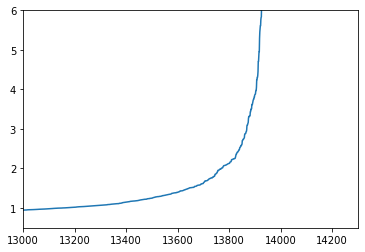

In [68]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim([13000, 14300])
plt.ylim([0.5,6])
plt.plot(distances)